# Clustering

In this notebook we will code and use different clustering techniques. The objective is to learn how to use them and understand the effects of different parameters. 

We will test:

- kMeans
- hierarchical clustering
- DBscan


Used for:

- Segmentation
- Social Network Analysis
- Outlier detection
- Association Rules

In [1]:
# libraries 

import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=4, suppress=True)

# Generate random data

We're going to generate random data normally distributed around three centers, with noise. We will test the algorithms on this data.

In [3]:
NPOINTSPERCLUSTER = 200

In [85]:
# Set three centers
center_1 = np.array([0,0])
center_2 = np.array([3,4])
center_3 = np.array([6,1])

# Generate random data around the three centers
data_1 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_1
data_2 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_2
data_3 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)
print(data.shape)

data[0:10]

(600, 2)


array([[-1.4231, -1.7819],
       [-1.6912,  0.8088],
       [-0.6034, -2.4072],
       [ 0.9055,  0.1667],
       [-1.9737, -0.6648],
       [ 0.084 ,  0.1325],
       [-1.2647, -0.5628],
       [-1.3251, -0.5415],
       [ 0.5394,  0.7396],
       [-0.0022, -1.6831]])

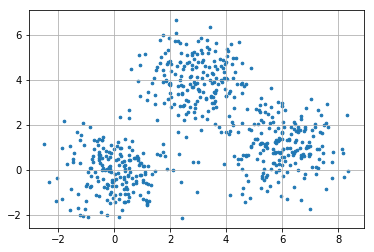

In [10]:
plt.scatter(data[:,0], data[:,1], s=7)
plt.grid(True); #s=size

# Implementation of K-Means

Asignación de los centroides iniciales se hace de forma aleatoria

In this section we will implement kmeans algorithm. 

### Number of Clusters

- Elbow Method

![img](https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/004-cluster-validation/figures/015-determining-the-optimal-number-of-clusters-k-means-optimal-clusters-wss-silhouette-1.png)

### Limitations 

![img](https://image.slidesharecdn.com/s3o456brqtm41i9vhb1q-signature-d503319da1301971aeeaa1b7e38d890bf394f7e6fb2415f661de7d4d58f0c518-poli-151222093950/95/kmeans-algorithm-12-638.jpg?cb=1450777218)

![img](https://image.slidesharecdn.com/s3o456brqtm41i9vhb1q-signature-d503319da1301971aeeaa1b7e38d890bf394f7e6fb2415f661de7d4d58f0c518-poli-151222093950/95/kmeans-algorithm-11-638.jpg?cb=1450777218)

![img](https://image.slidesharecdn.com/s3o456brqtm41i9vhb1q-signature-d503319da1301971aeeaa1b7e38d890bf394f7e6fb2415f661de7d4d58f0c518-poli-151222093950/95/kmeans-algorithm-10-638.jpg?cb=1450777218)

![img](https://image.slidesharecdn.com/s3o456brqtm41i9vhb1q-signature-d503319da1301971aeeaa1b7e38d890bf394f7e6fb2415f661de7d4d58f0c518-poli-151222093950/95/kmeans-algorithm-13-638.jpg?cb=1450777218)

### Convergencia

- Número de iteraciones
- Distancia entre Centroides antiguos y nuevos
- points that switch cluster

### Cosas a tener en cuenta

- Ver número de puntos en cada cluster (podremos analizar outliers)

### Algorithm

```
clustering (data, K):
    Randomly initialize K cluster centroids (mu(1),..., mu(k))
    Repeat until convergence:
        # assign cluster
        for d in data:
            assign d to closest cluster centroid
        # recompute cluster centroid
        for k = 1 to K:
            mu(k) = mean of data points assigned to cluster k
            
```

### Exercise 1: complete the following code so that it follows k-means algorithm

- Assume data is a a (Npoints, dim) numpy array. 
- Hint: use `numpy.linalg.norm()` to compute euclidean distance
- Hint: `amin` and `amax` functions may be useful

In [63]:
def kmeans (data, K):
    
    N = data.shape[0]
    dim = data.shape[1]
    
    
    # compute min and max data to generate random centroids inside
    # min_ = np.amin(data, axis = 0)
    # max_ = np.amax(data, axis = 0)
    
    # generate K random centroids
    # centroids= np.random.uniform(low=min_,high=max_,size(K,dim))
    
    # generate centroids
    centroids = random.choices(data,k=K)
    
    # initialize vectors
    new_centroids = np.zeros((K, dim))
    distances = np.zeros((N, K))
    
    
    # repeat until convergence
    niter = 1
    while True:
        
        # compute distance of each point to cluster centroid
        for i in range(K):
            distances[:,i] = np.linalg.norm(data-centroids[i], axis=1)
      
        
        # assign points to closest centroid
        #clusters = np.zeros((N,1))
        #for i in range(N):
        #clusters[i] = np.argmin(distances[i])
        clusters = np.argmin(distances, axis =1)
        # clusters = ...
        
        # recompute clusters' centroids
        # Calculate mean for every cluster and update the center
        for i in range(K):
            new_centroids[i] = np.mean(data[clusters == i], axis=0)
        
        # compute if there is any variation
        if np.array_equal(centroids, new_centroids):
            break
            
        centroids = new_centroids.copy()
        
    return clusters, centroids

In [64]:
# let's try our algorithm
K = 3
clusters, centroids = kmeans(data, K)

In [66]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [67]:
centroids

array([[ 0.0593, -0.0759],
       [ 2.9042,  4.0456],
       [ 6.0042,  1.0403]])

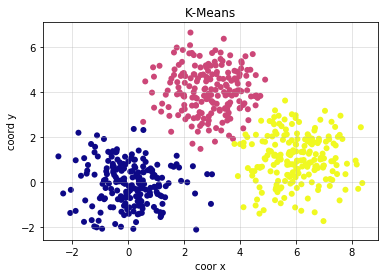

In [72]:
plt.scatter(data[:,0], data[:,1], c=clusters, cmap="plasma", linewidths=0)
plt.grid(True, alpha=0.4)
plt.title('K-Means')
plt.xlabel('coor x')
plt.ylabel('coord y');

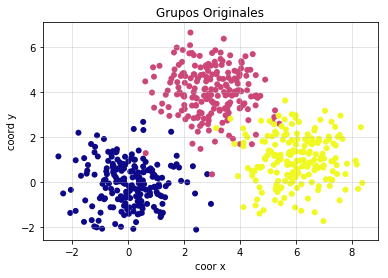

In [74]:
# comparison to original distribution where data came from
original_groups = np.concatenate((np.repeat(0, NPOINTSPERCLUSTER), 
                                  np.repeat(1, NPOINTSPERCLUSTER), 
                                  np.repeat(2, NPOINTSPERCLUSTER)))
plt.scatter(data[:,0], data[:,1], c=original_groups, cmap="plasma", linewidths=0)
plt.grid(True, alpha=0.4)
plt.title('Grupos Originales')
plt.xlabel('coor x')
plt.ylabel('coord y');

In [75]:
# comparison to original distribution where data came from
# we create a df with the clusters and compute the 'confussion' matrix

df = pd.DataFrame({'original' : original_groups, 'kmeans': clusters})
df.groupby(['original', 'kmeans']).size().reset_index(name='n')\
    .pivot(index='original', columns='kmeans', values='n').fillna(0)

kmeans,0,1,2
original,,,
0,198.0,2.0,0.0
1,2.0,191.0,7.0
2,0.0,3.0,197.0


Let's use built-in function to compute agreement.

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(original_groups, clusters)

0.9766666666666667

In [ ]:
mapping = {0:2, 1:0, 2:1}
print(original_groups[0:10])
print(clusters[0:10])
print([mapping[c] for c in clusters][0:10])

In [ ]:
accuracy_score(original_groups, [mapping[c] for c in clusters])

### Exercise 2: Add cluster centroid to the plot

Hint: use marker 'D' (diamond) and a high size so that it is visible on top of the points.

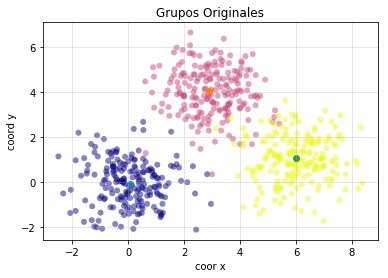

In [80]:
# to-do
plt.scatter(data[:,0], data[:,1], c=original_groups, cmap="plasma", linewidths=0, alpha=0.5)
plt.grid(True, alpha=0.4)
plt.title('Grupos Originales')
plt.xlabel('coor x')
plt.ylabel('coord y')
plt.scatter(centroids[0,0],centroids[0,1])
plt.scatter(centroids[1,0],centroids[1,1])
plt.scatter(centroids[2,0],centroids[2,1]);

### Exercise 3: modify k-means function so that we can see the cluster assignation after each iteration

Notes: 
- in notebooks it's not straightforward to see the 'animation' effect; so just plot one figure below each other.
- we add a `plot` parameter so we can decide wether to plot or not

# HACERRRRRRR

def kmeans (data, K):
    
    N = data.shape[0]
    dim = data.shape[1]
    
    
    # compute min and max data to generate random centroids inside
    # min_ = np.amin(data, axis = 0)
    # max_ = np.amax(data, axis = 0)
    
    # generate K random centroids
    # centroids= np.random.uniform(low=min_,high=max_,size(K,dim))
    
    # generate centroids
    centroids = random.choices(data,k=K)
    
    # initialize vectors
    new_centroids = np.zeros((K, dim))
    distances = np.zeros((N, K))
    
    
    # repeat until convergence
    niter = 1
    while True:
        
        # compute distance of each point to cluster centroid
        for i in range(K):
            distances[:,i] = np.linalg.norm(data-centroids[i], axis=1)
      
        
        # assign points to closest centroid
        #clusters = np.zeros((N,1))
        #for i in range(N):
        #clusters[i] = np.argmin(distances[i])
        clusters = np.argmin(distances, axis =1)
        # clusters = ...
        
        # recompute clusters' centroids
        # Calculate mean for every cluster and update the center
        for i in range(K):
            new_centroids[i] = np.mean(data[clusters == i], axis=0)
        
        # HACERRRRR
        if plot:
            plt.figure(figsize=(8,4))
   

        
        
        # compute if there is any variation
        if np.array_equal(centroids, new_centroids):
            break
            
        centroids = new_centroids.copy()
        
    return clusters, centroids
    

K = 3
clusters, centroids = kmeans(data, K, plot=True)

### Exercise 4: Take some time to play with different number of (original) distributions and clusters and see the effect when number of clusters does not match true data

15 minutes. 

# Set three centers
center_1 = np.array([0,0])
center_2 = ...
center_3 = ...
...

# Generate random data around the three centers
data_1 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_1
data_2 = ...
... 

data = np.concatenate((data_1, data_2, ...), axis = 0)

k = ...
kmeans(data, k)

## Computing how good the cluster partition is

Remember SSE (Sum of Squared Error):
$$
SSE = \sum_{i=1}^N (x_i - C_{(X_i)})^2
$$
where $C_{(X_i)}$ represents the cluster centroid of $X_i$.



### Exercise: complete SSE function and compute clustering metrics for different number of clusters

# REHACERRRR

def sse(data, clusters, centroids):
    # to-do
    return np.sum(np.square(np.linalg.norm(data-centroids[clusters], axis =1)))

# REHACERRR

ks = range(2, 20)
sse_errors = np.zeros(len(ks))

for i, k in enumerate(ks):
    clusters_, centroids_ = kmeans(data,K)
    sse_errors[i] = sse(data, clusters_, centroids_)
    print(k, sse_errors[i])
    
    #if np.isnan(sse_errors[i]):
    #    print(clusters_)
    #    print(centroids_)

plt.plot(ks, sse_errors, 'o-');

# scikit-learn K-means

Now we are going to use scikit-learn library for our exercise

KMeans works as other models in sklearn:

- define the model (and parameters)
- fit the model on training dataset
- apply the fitted model on another dataset (can be the same dataset)

In [93]:
from sklearn.cluster import KMeans

In [94]:
# inspect help
?KMeans

Init signature: KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
Docstring:     
K-Means clustering

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, optional, default: 8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random' or an ndarray}
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

n_init : int, default: 10
    Number of time the k-means algorithm will be run with different
    c

In [95]:
# define the model
model = KMeans(n_clusters = 3)

In [96]:
# fit the model on training data
model = model.fit(data)

In [97]:
# press tab to see available methods
#model. #press tab
print(model.cluster_centers_)
print(model.labels_)
print(model.inertia_) # sse

[[ 2.9767  4.0366]
 [-0.0432 -0.2175]
 [ 6.1618  1.0749]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [98]:
# check inertia is our sse defined function
abs(model.inertia_ - sse(data, model.labels_, model.cluster_centers_)) < 0.01

True

In [99]:
# apply the fitted model 
# if applied to the same data, we get model.labels_
clusters_sk = model.predict(data)

In [100]:
all(model.labels_ == clusters_sk)

True

In [101]:
clusters_sk

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [102]:
def plot_clustering(data, clusters, centroids = None):
    
    K_ = len(set(clusters))
    
    plt.figure(figsize=(8,4))
    plt.scatter(data[:,0], data[:,1], c=clusters, cmap="plasma", linewidths=0)

    if centroids != None:
        for k in range(K_):
            plt.scatter(centroids[k,0], centroids[k, 1], s=100, marker='D', color='red')
        
    plt.show()

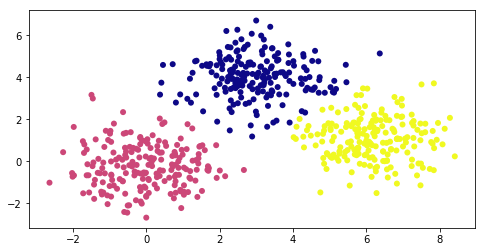

In [103]:
plot_clustering(data, clusters_sk)

In [104]:
# Centroid values
centroids_sk = model.cluster_centers_
centroids_sk

array([[ 2.9767,  4.0366],
       [-0.0432, -0.2175],
       [ 6.1618,  1.0749]])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

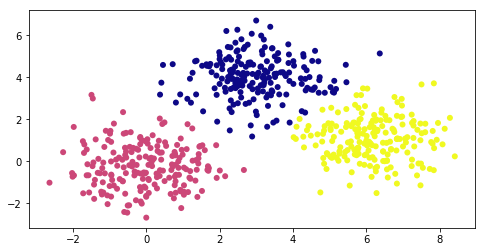

In [105]:
plot_clustering(data, clusters_sk, centroids_sk)

In [106]:
# compare with our implementation

print(centroids)
print(centroids_sk)

#plot_clustering(data, clusters, centroids)
#plot_clustering(data, clusters_sk, centroids_sk)

[[ 0.0593 -0.0759]
 [ 2.9042  4.0456]
 [ 6.0042  1.0403]]
[[ 2.9767  4.0366]
 [-0.0432 -0.2175]
 [ 6.1618  1.0749]]


# Hierarchical Clustering

In this section we will learn how to apply Hierarchical Clustering in Python. 

We will use `scipy` package:

- `linkage` function computes the distance matrix between the points
- `dendrogram` function plots the dendrogram using the distances
- `fcluster` function performs a clustering assignment according to different parameters

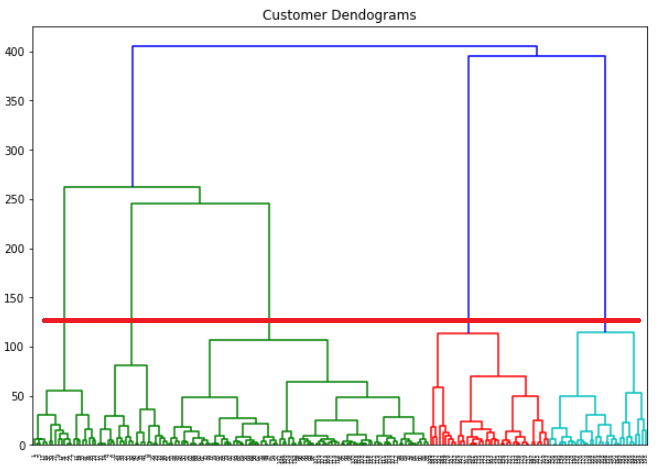

![img](https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_0011.png)

# Pros
- No especificas número de clusters
- No tienen que ser clusters esfericos como en k-means

# Cons

- Necesitas especificar un umbral de distancias (elegir número de clusters
- Semsible a la distancias y al linkage criterion




In [107]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [108]:
?linkage

Signature: linkage(y, method='single', metric='euclidean', optimal_ordering=False)
Docstring:
Perform hierarchical/agglomerative clustering.

The input y may be either a 1d compressed distance matrix
or a 2d array of observation vectors.

If y is a 1d compressed distance matrix,
then y must be a :math:`{n \choose 2}` sized
vector where n is the number of original observations paired
in the distance matrix. The behavior of this function is very
similar to the MATLAB linkage function.

A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
:math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
cluster with an index less than :math:`n` corresponds to one of
the :math:`n` original observations. The distance between
clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
fourth value ``Z[i, 3]`` represents the number of original
observations in the newly formed cluster.

The following linkage methods are used to compu

In [109]:
Z = linkage(data, 'ward') #'single', 'ward', ...

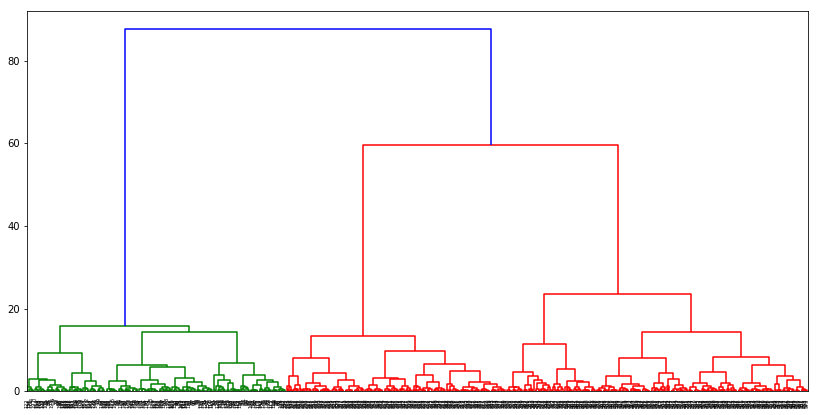

In [111]:
plt.figure(figsize=(14, 7))
dendrogram(Z)
plt.show()

Now let's understand how the algorithm works. 

It follows an agglomerative approach, so *close* points are merged. 

`linkage` returns how points are merged at each iteration. The output is: [`id_node_1`, `id_node_2`, `distance`, `number_of_points_in_group`]

In [112]:
Z[0:20]

array([[253.    , 342.    ,   0.0134,   2.    ],
       [481.    , 542.    ,   0.0136,   2.    ],
       [132.    , 188.    ,   0.0158,   2.    ],
       [240.    , 392.    ,   0.0161,   2.    ],
       [465.    , 595.    ,   0.0173,   2.    ],
       [466.    , 568.    ,   0.0242,   2.    ],
       [246.    , 315.    ,   0.0256,   2.    ],
       [494.    , 572.    ,   0.0268,   2.    ],
       [438.    , 509.    ,   0.029 ,   2.    ],
       [511.    , 586.    ,   0.0295,   2.    ],
       [521.    , 569.    ,   0.0309,   2.    ],
       [149.    , 198.    ,   0.0341,   2.    ],
       [516.    , 563.    ,   0.0351,   2.    ],
       [525.    , 601.    ,   0.0356,   3.    ],
       [366.    , 391.    ,   0.0359,   2.    ],
       [127.    , 152.    ,   0.0365,   2.    ],
       [499.    , 594.    ,   0.0367,   2.    ],
       [215.    , 349.    ,   0.039 ,   2.    ],
       [110.    , 199.    ,   0.0396,   2.    ],
       [238.    , 280.    ,   0.0404,   2.    ]])

In [113]:
# indices
np.where(Z[:,0] > data.shape[0])[0:20]

(array([102, 134, 143, 154, 161, 177, 220, 226, 256, 269, 270, 272, 273,
        276, 292, 303, 309, 313, 320, 323, 324, 327, 329, 335, 343, 344,
        348, 350, 352, 354, 356, 360, 363, 365, 369, 370, 373, 374, 380,
        382, 385, 387, 389, 390, 391, 392, 393, 397, 398, 399, 400, 404,
        405, 406, 407, 409, 410, 411, 412, 415, 417, 418, 419, 422, 424,
        425, 426, 427, 428, 430, 433, 434, 435, 436, 437, 438, 439, 440,
        441, 442, 443, 444, 445, 446, 448, 449, 450, 451, 452, 453, 454,
        455, 456, 457, 458, 459, 460, 461, 463, 464, 465, 466, 467, 468,
        469, 471, 472, 473, 475, 477, 478, 479, 480, 481, 482, 483, 484,
        486, 488, 489, 490, 491, 492, 494, 495, 496, 497, 499, 500, 501,
        502, 503, 504, 505, 507, 509, 510, 511, 512, 514, 515, 516, 517,
        518, 520, 521, 522, 523, 524, 526, 527, 528, 529, 530, 531, 532,
        533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545,
        546, 547, 548, 549, 550, 551, 552, 553, 554

In [114]:
Z[Z[:,0] > data.shape[0]][0:20]

array([[617.    , 619.    ,   0.0976,   4.    ],
       [607.    , 621.    ,   0.1232,   4.    ],
       [654.    , 719.    ,   0.1298,   4.    ],
       [652.    , 681.    ,   0.1361,   4.    ],
       [609.    , 689.    ,   0.144 ,   4.    ],
       [635.    , 705.    ,   0.1574,   4.    ],
       [616.    , 685.    ,   0.1841,   4.    ],
       [633.    , 672.    ,   0.1869,   4.    ],
       [632.    , 686.    ,   0.2106,   4.    ],
       [690.    , 824.    ,   0.2216,   4.    ],
       [670.    , 702.    ,   0.2216,   7.    ],
       [666.    , 788.    ,   0.2219,   5.    ],
       [695.    , 826.    ,   0.224 ,   7.    ],
       [726.    , 820.    ,   0.2272,   6.    ],
       [640.    , 827.    ,   0.2496,   5.    ],
       [659.    , 794.    ,   0.2592,   5.    ],
       [748.    , 763.    ,   0.2733,   5.    ],
       [762.    , 848.    ,   0.2768,   5.    ],
       [623.    , 801.    ,   0.2842,   4.    ],
       [714.    , 916.    ,   0.2879,   5.    ]])

### Exercise 6: dendrogram plotting options

Investigate dendrogram plotting options and play with them.

- p:
- truncate_mode: 'lastp', 'level'
- color_threshold
- orientation
- count_sort: False, 'ascending'/True, 'descendent'
- distance_sort: False, 'ascending'/True, 'descendent'
- show_leaf_counts: boolean (True)
- show_contracted: boolean (False)
- above_threshold_color = 'b'

# HACERRRR
# exercise
plt.figure(figsize=(14, 4))
dendrogram(Z, ...)
plt.show()

# HACERRRR
# exercise
plt.figure(figsize=(14, 4))
dendrogram(Z, ...)
plt.show()

# HACERRRR
# exercise
plt.figure(figsize=(14, 4))
dendrogram(Z, ...)
plt.show()

## Getting the cluster partition

In order to assign a cluster to each sample we first need to set the cut_off distance. We will visually explore what this value is and use it for partitioning. 

We then use function `fcluster` to perform the clustering.

In [116]:
?dendrogram

Signature: dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='b')
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children.  The top of the U-link indicates a
cluster merge.  The two legs of the U-link indicate which clusters
were merged.  The length of the two legs of the U-link represents
the distance between the child clusters.  It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix encoding the hierarchical clustering to
    render as a dendrogram. See the ``link

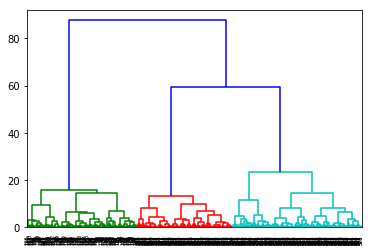

In [117]:
dendrogram(Z, color_threshold = 25)
plt.show()

In [119]:
cut_distance = 25
clusters_hc = fcluster(Z, t = cut_distance, criterion='distance')

In [120]:
np.unique(clusters_hc, return_counts = True)

(array([1, 2, 3], dtype=int32), array([199, 169, 232]))

In [121]:
clusters_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,

### Exercise 7: change cut_distance and see how the number of clusters change

It should match the dendrogram plotting

In [123]:
# Coger 2 clusters en contra de 3
cut_distance = 70
clusters_hc = fcluster(Z, t = cut_distance, criterion='distance')
np.unique(clusters_hc, return_counts = True)

(array([1, 2], dtype=int32), array([199, 401]))

### Exercise 8: change `method` parameter in the linkage function and observe the results

# To-Do
linked = linkage(data, 'to-do') #'single', 'ward', ...
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.show()

dendrogram(linked, color_threshold=cut_distance)
plt.show()

#### AgglomerativeClustering in scikit-learn

In order to perform the clustering partition, we can also use `AgglomerativeClustering` from `sklearn` once we have selected the desired number of clusters. 

In [124]:
from sklearn.cluster import AgglomerativeClustering

# define the model
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  

# fit data and predict 
clusters = cluster.fit_predict(data)

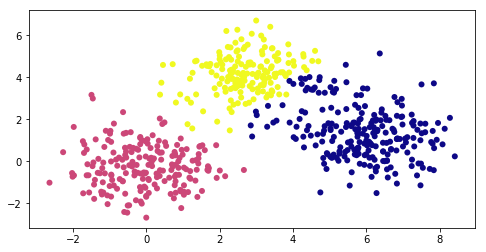

In [125]:
plot_clustering(data, clusters)

### Comparison kmeans and hierarchical

Now let's compare the result of both algorithms when the number of clusters is not optimal

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

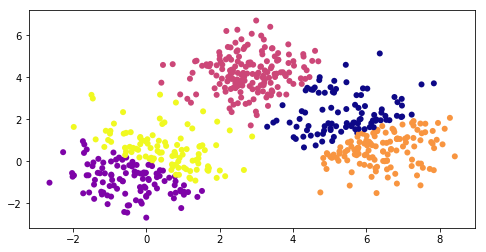

In [126]:
NCLUS = 5

km = KMeans(n_clusters=NCLUS)
clusters_km = km.fit_predict(data)
plot_clustering(data, clusters_km, km.cluster_centers_)

hier = AgglomerativeClustering(n_clusters=NCLUS, affinity='euclidean', linkage='ward')
clusters_hier = hier.fit_predict(data)
plot_clustering(data, clusters_hier)

#### DBSCAN

In this section we will learn how DBscan algorithm works and what's the effect of its parameters in the clustering result. 

- Muy utilizado
- Minpts se escoge manualmente (minpts ~ 5)
- eps based on k-distance plot

![img](https://slideplayer.com/slide/3289722/11/images/40/DBSCAN%3A+Determining+Eps+and+MinPts.jpg)

# Pros
- Clusters k son automáticamente encontrados
- Capaz de asignar que algo es ruido

# Cons
- Se necesita especificar eps y minpts
- Muy lentooo
- Cuando hay densidades muy muy diferentes

![img](http://www.sthda.com/sthda/RDoc/figure/clustering/dbscan-density-based-clustering-density-based-clustering-1.png)



In [127]:
from sklearn.cluster import DBSCAN

In [151]:
dbs = DBSCAN(eps=0.5, min_samples=5)
dbs = dbs.fit(data)

In [152]:
dbs.labels_[0:50]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [153]:
# -1 son outliers

id_clusters = np.unique(dbs.labels_)
print('Found {} clusters'.format(len(id_clusters)))
np.unique(dbs.labels_, return_counts=True)

Found 5 clusters


(array([-1,  0,  1,  2,  3]), array([ 42, 187, 175, 191,   5]))

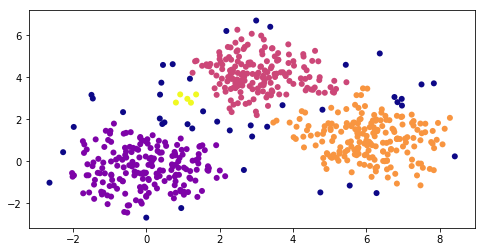

In [154]:
plot_clustering(data, dbs.labels_)

### Exercise 9: play with the parameters `eps` and `min_samples` and see how it affects the clustering partition
10 min

# HACERRRR

# exercise
dbs = DBSCAN(eps=..., min_samples=...)
dbs = dbs.fit(data)
plot_clustering(data, dbs.labels_)

# New data : non-convex datasets

Now we will apply DBscan on non convex data to see the differences with k-means. We will also learn how to load already-predefined datasets from `sklearn`

In [155]:
from sklearn import datasets

nsamples = 1000

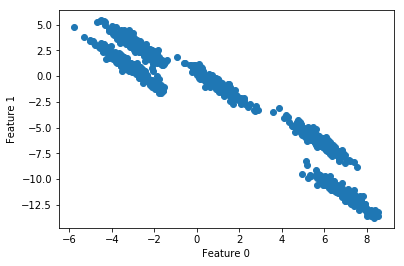

In [156]:
# make_blobs
# this creates 'centers' circles
# we will change the covariance so that the clusters become ellipses

X, y = datasets.make_blobs(random_state=170, n_samples=nsamples, centers = 5)
transformation = np.random.RandomState(74).normal(size=(2, 2))
X = np.dot(X, transformation)

# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Compare DBscan against Kmeans on that data

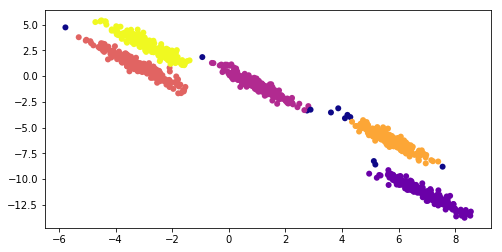

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

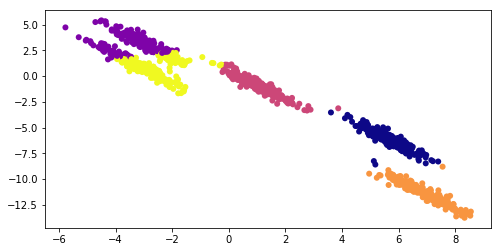

In [157]:
dbscan_model = DBSCAN(eps=0.4, min_samples=5)
dbscan_model = dbscan_model.fit(X)

kmeans_model = KMeans(n_clusters = 5)
kmeans_model = kmeans_model.fit(X)

plot_clustering(X, dbscan_model.labels_)
plot_clustering(X, kmeans_model.labels_, kmeans_model.cluster_centers_)

In [ ]:
# Exercise: test other datasets
# datasets.make_circles
# datasets.make_moons
# datasets.make_s_curve (Hint: use dimensions 0 and 2 of the generated dataset)
# datasets.make_swiss_roll (Hint: use dimensions 0 and 2 of the generated dataset)

In [ ]:
# make_circles
# ...

In [ ]:
# make_mooons
# ...

In [ ]:
# make_s_curve
# ... 

In [ ]:
# make_swiss_roll
# ...

Some code and ideas are based on:

- https://mubaris.com/posts/kmeans-clustering/
- https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python
- https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/


### End.

# OPTICS

- density based clustering
- based on DBScan
- Resuelve DBScan problem de densidades muy dispares !!!!!!
- Es Mejor que DBScan
- Tiempo de computación puede ser alto


![img](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/OPTICS.svg/712px-OPTICS.svg.png)

